# DATA ANALYSIS Project on Dengue Fever : Worldwide health threat
DataSet: https://www.kaggle.com/datasets/parvezalmuqtadir2348/dengue-fever-worldwide-updated

## "Let's import all the necessary libraries."



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/python projects/Dengue-worldwide-dataset-modified.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.head())

  dengue.p_i_d dengue.date_of_fever dengue.dwelling place  dengue.days  \
0         P001               13-Jan              Bangalore     10 days   
1         P002               13-Feb              New Delhi      4 days   
2         P003                9-Jan                 Jamica      5 days   
3         P004               12-Aug               Barbados     12 days   
4         P005               12-Oct              St.Martin      3 days   

   current_temp  dengue.wbc dengue.servere_headche  \
0         100.0         5.0                    yes   
1         104.0         1.0                     no   
2         104.0         4.3                    yes   
3         101.0         1.8                    yes   
4         101.0         3.2                    yes   

  dengue.pain_behind_the_eyes dengue.joint_muscle_aches  \
0                          no                        no   
1                         yes                       yes   
2                          no                        

In [ ]:
# Summary statistics
print(df.describe())

       current_temp  dengue.wbc  dengue.hemoglobin  dengue._hematocri  \
count    819.000000  820.000000         819.000000         820.000000   
mean     103.710012    3.041707          13.294200          32.236585   
std       32.540625    1.388147           3.122657           7.292938   
min      100.000000    1.000000           8.500000          20.000000   
25%      102.000000    2.100000          10.500000          26.000000   
50%      103.000000    2.900000          13.300000          32.000000   
75%      104.000000    4.000000          15.900000          38.000000   
max     1033.000000   24.000000          18.800000          45.000000   

       dengue.platelet  
count       820.000000  
mean         96.932927  
std          39.018190  
min          40.000000  
25%          75.000000  
50%          95.000000  
75%         120.000000  
max         875.000000  


In [ ]:
# Data types and missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   dengue.p_i_d                        820 non-null    object 
 1   dengue.date_of_fever                820 non-null    object 
 2   dengue.dwelling place               820 non-null    object 
 3   dengue.days                         813 non-null    object 
 4   current_temp                        819 non-null    float64
 5   dengue.wbc                          820 non-null    float64
 6   dengue.servere_headche              820 non-null    object 
 7   dengue.pain_behind_the_eyes         820 non-null    object 
 8   dengue.joint_muscle_aches           820 non-null    object 
 9   dengue.metallic_taste_in_the_mouth  820 non-null    object 
 10  dengue.appetite_loss                820 non-null    object 
 11  dengue.addominal_pain               820 non-n



> The dataset comprises 820 entries with 18 columns, detailing various aspects of dengue fever cases including patient identification, symptoms, clinical measurements, and diagnostic outcomes. However, it requires some cleaning to handle missing values, categorical values and fixed the date format.



## Data Cleaning

In [ ]:
#Convert categorical data to numeric

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Columns to encode
categorical_columns = ['dengue.p_i_d','dengue.servere_headche', 'dengue.pain_behind_the_eyes',
                       'dengue.joint_muscle_aches', 'dengue.metallic_taste_in_the_mouth',
                       'dengue.appetite_loss', 'dengue.addominal_pain',
                       'dengue.nausea_vomiting', 'dengue.diarrhoea', 'dengue_or_not']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
print(df.head())
print(df.info())

   dengue.p_i_d dengue.date_of_fever dengue.dwelling place  dengue.days  \
0             0               13-Jan              Bangalore     10 days   
1             1               13-Feb              New Delhi      4 days   
2             2                9-Jan                 Jamica      5 days   
3             3               12-Aug               Barbados     12 days   
4             4               12-Oct              St.Martin      3 days   

   current_temp  dengue.wbc  dengue.servere_headche  \
0         100.0         5.0                       1   
1         104.0         1.0                       0   
2         104.0         4.3                       1   
3         101.0         1.8                       1   
4         101.0         3.2                       1   

   dengue.pain_behind_the_eyes  dengue.joint_muscle_aches  \
0                            0                          0   
1                            1                          1   
2                            0     

In [ ]:
# Function to extract numeric part from strings
def extract_numeric(value):
    import re
    match = re.search(r'(\d+)', str(value))
    return float(match.group(1)) if match else np.nan

# Apply the function to 'dengue.days' column
df['dengue.days'] = df['dengue.days'].apply(extract_numeric)
# Fill missing values
df['dengue.days'].fillna(df['dengue.days'].median(), inplace=True)
df['current_temp'].fillna(df['current_temp'].median(), inplace=True)
df['dengue.hemoglobin'].fillna(df['dengue.hemoglobin'].median(), inplace=True)

print(df.isnull().sum())

dengue.p_i_d                          0
dengue.date_of_fever                  0
dengue.dwelling place                 0
dengue.days                           0
current_temp                          0
dengue.wbc                            0
dengue.servere_headche                0
dengue.pain_behind_the_eyes           0
dengue.joint_muscle_aches             0
dengue.metallic_taste_in_the_mouth    0
dengue.appetite_loss                  0
dengue.addominal_pain                 0
dengue.nausea_vomiting                0
dengue.diarrhoea                      0
dengue.hemoglobin                     0
dengue._hematocri                     0
dengue.platelet                       0
dengue_or_not                         0
dtype: int64


In [ ]:
# Convert 'dengue.date_of_fever' to datetime format
df['dengue.date_of_fever'] = pd.to_datetime(df['dengue.date_of_fever'], format='%d-%b')

# Replace the year with the current year (2024)
current_year = 2024
df['dengue.date_of_fever'] = df['dengue.date_of_fever'].apply(lambda x: x.replace(year=current_year) if pd.notnull(x) else x)

# Optionally, format the date in 'MM/DD/YYYY' format
df['dengue.date_of_fever'] = df['dengue.date_of_fever'].dt.strftime('%m/%d/%Y')

# Display the DataFrame to check the changes
print(df['dengue.date_of_fever'])

0      01/13/2024
1      02/13/2024
2      01/09/2024
3      08/12/2024
4      10/12/2024
          ...    
815    07/05/2024
816    03/23/2024
817    07/07/2024
818    12/16/2024
819    03/13/2024
Name: dengue.date_of_fever, Length: 820, dtype: object


In [ ]:
print(df.head())

   dengue.p_i_d dengue.date_of_fever dengue.dwelling place   dengue.days  \
0             0           01/13/2024              Bangalore         10.0   
1             1           02/13/2024              New Delhi          4.0   
2             2           01/09/2024                 Jamica          5.0   
3             3           08/12/2024               Barbados         12.0   
4             4           10/12/2024              St.Martin          3.0   

   current_temp  dengue.wbc  dengue.servere_headche  \
0         100.0         5.0                       1   
1         104.0         1.0                       0   
2         104.0         4.3                       1   
3         101.0         1.8                       1   
4         101.0         3.2                       1   

   dengue.pain_behind_the_eyes  dengue.joint_muscle_aches  \
0                            0                          0   
1                            1                          1   
2                            



> The data is clean now. Lets do some analysis.


## Data Analysis

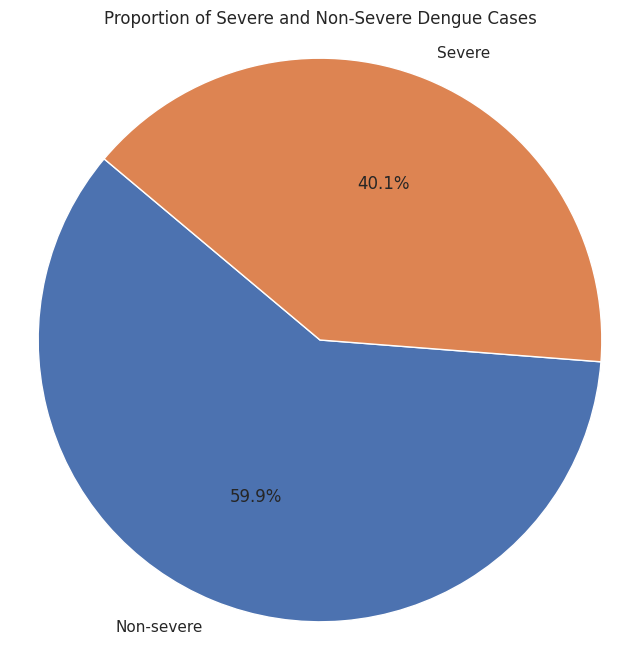

In [ ]:
# Proportion of Severe and Non-Severe Dengue Cases
severity_column = 'dengue_or_not'
severity_distribution = df[severity_column].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(severity_distribution, labels=['Non-severe', 'Severe'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Severe and Non-Severe Dengue Cases')
plt.axis('equal')
plt.show()

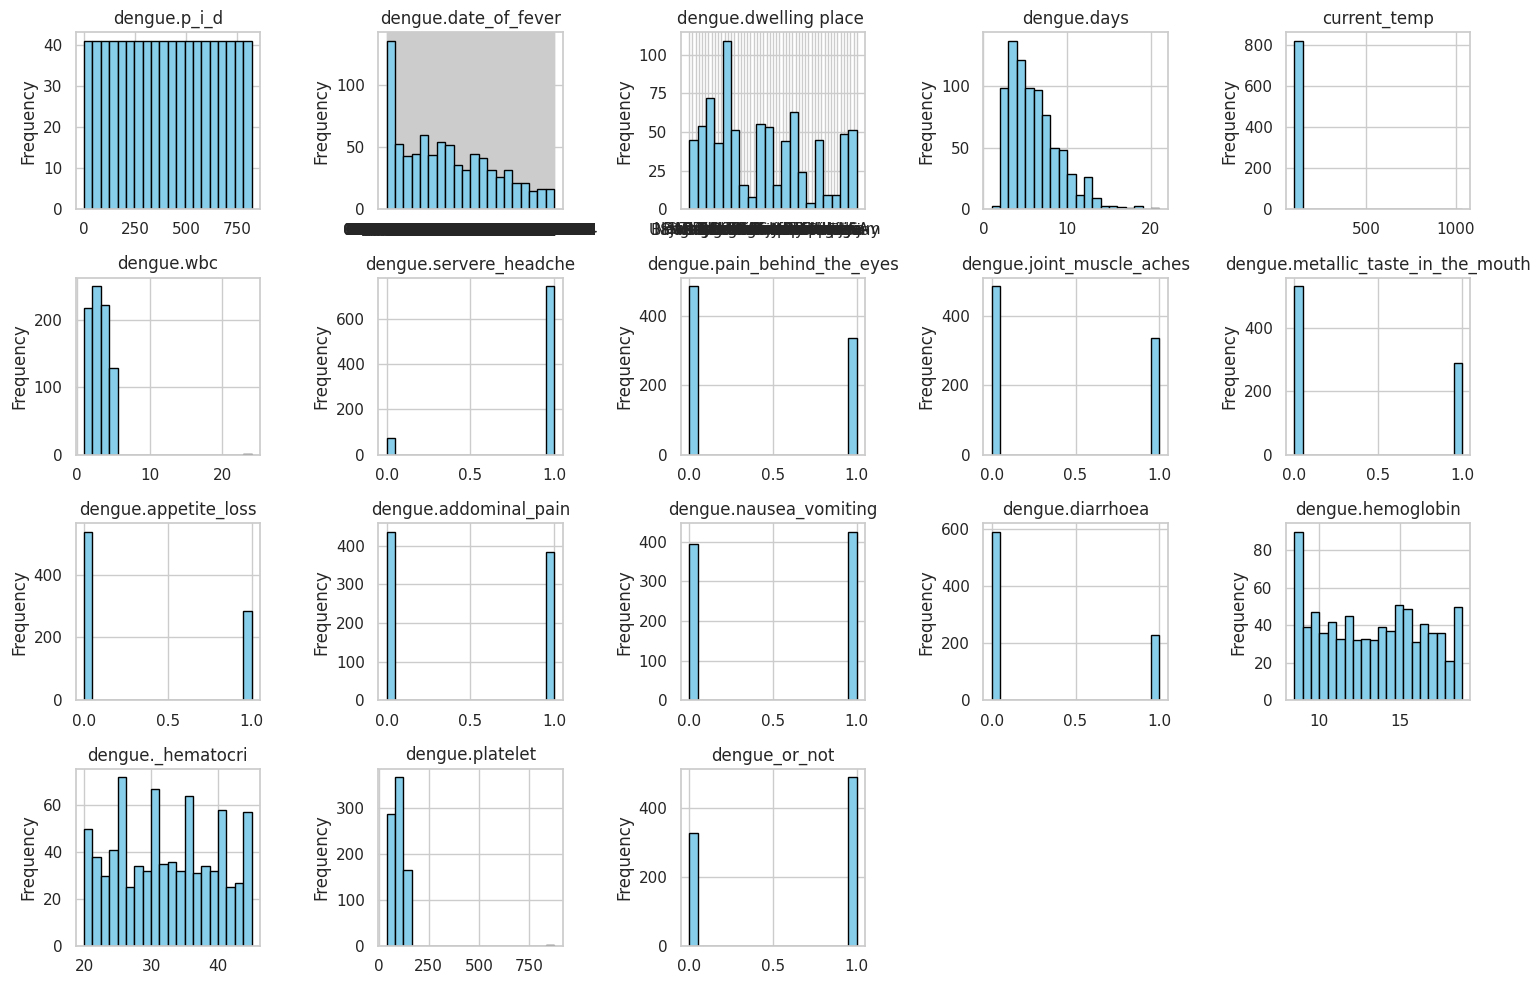

In [ ]:
# Plot histograms for all columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 5, i)
    df[column].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

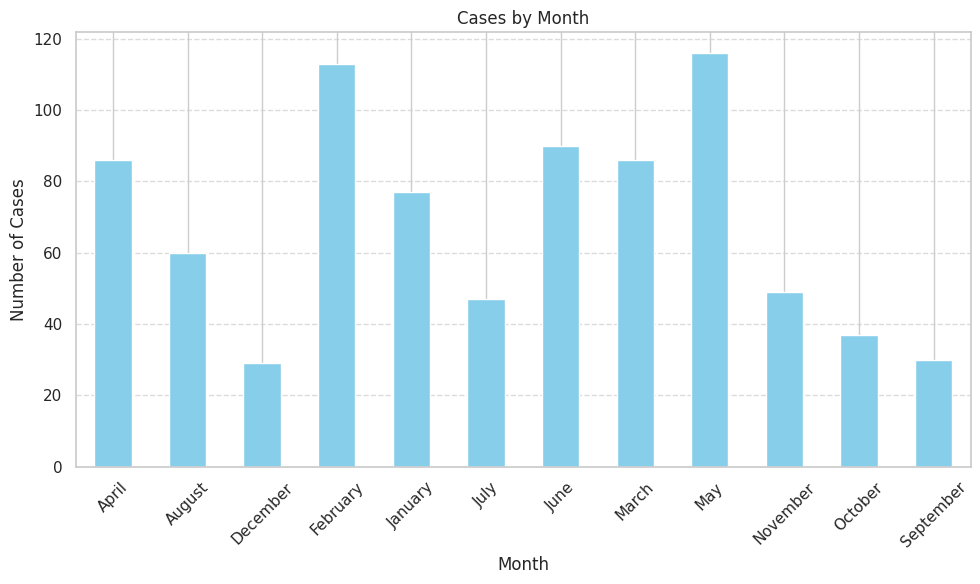

In [ ]:

# Convert 'dengue.date_of_fever' to datetime format
df['dengue.date_of_fever'] = pd.to_datetime(df['dengue.date_of_fever'])

# Extract month from 'dengue.date_of_fever'
df['Month'] = df['dengue.date_of_fever'].dt.month_name()

# Count cases by month
cases_by_month = df.groupby('Month').size()

# Plotting
plt.figure(figsize=(10, 6))
cases_by_month.plot(kind='bar', color='skyblue')
plt.title('Cases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

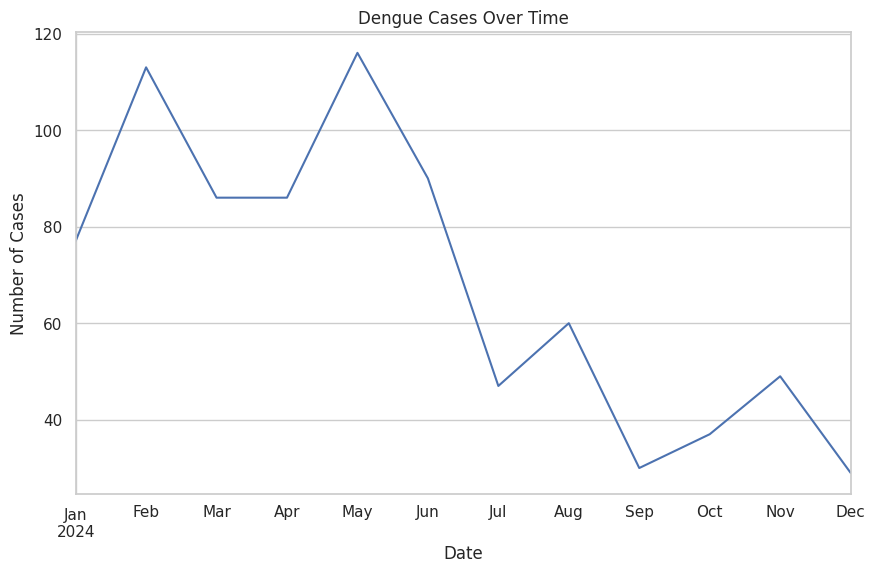

In [ ]:
plt.figure(figsize=(10, 6))
df['dengue.date_of_fever'] = pd.to_datetime(df['dengue.date_of_fever'])
df.set_index('dengue.date_of_fever').resample('M').size().plot()
plt.title('Dengue Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


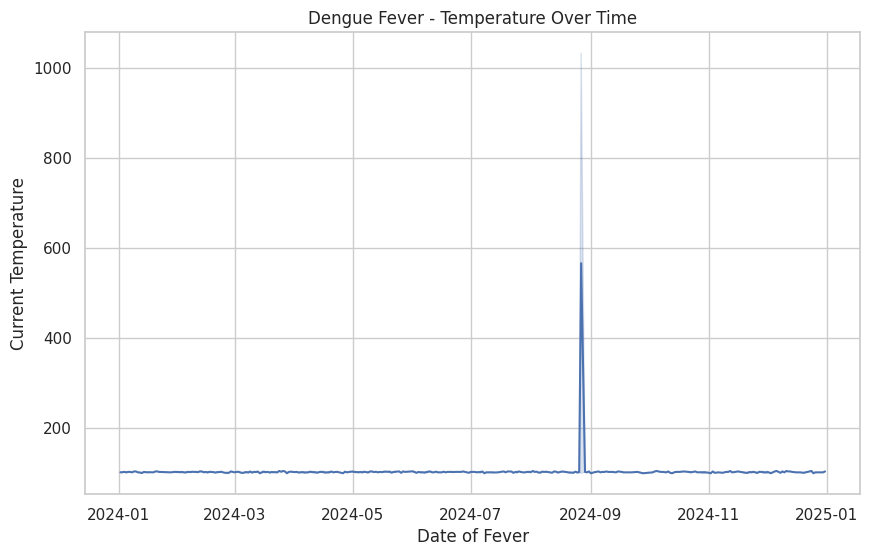

In [ ]:
# Temporal Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='dengue.date_of_fever', y='current_temp', data=df)
plt.title('Dengue Fever - Temperature Over Time')
plt.xlabel('Date of Fever')
plt.ylabel('Current Temperature')
plt.show()

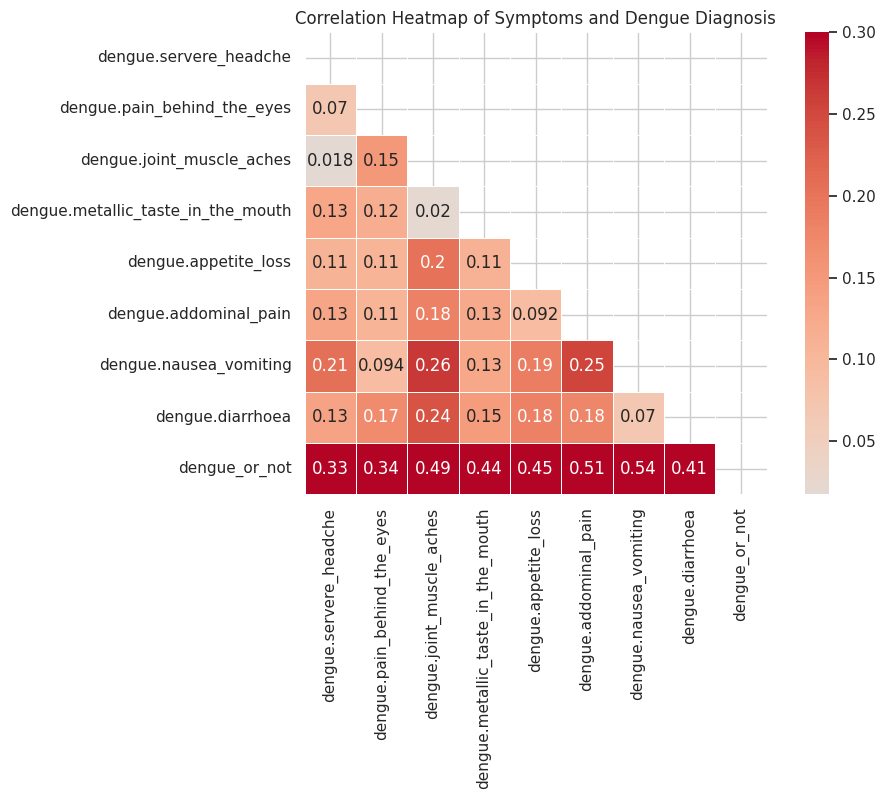

In [ ]:
# Compute the correlation matrix
corr = df[symptoms + ['dengue_or_not']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, annot=True)

plt.title('Correlation Heatmap of Symptoms and Dengue Diagnosis')
plt.show()

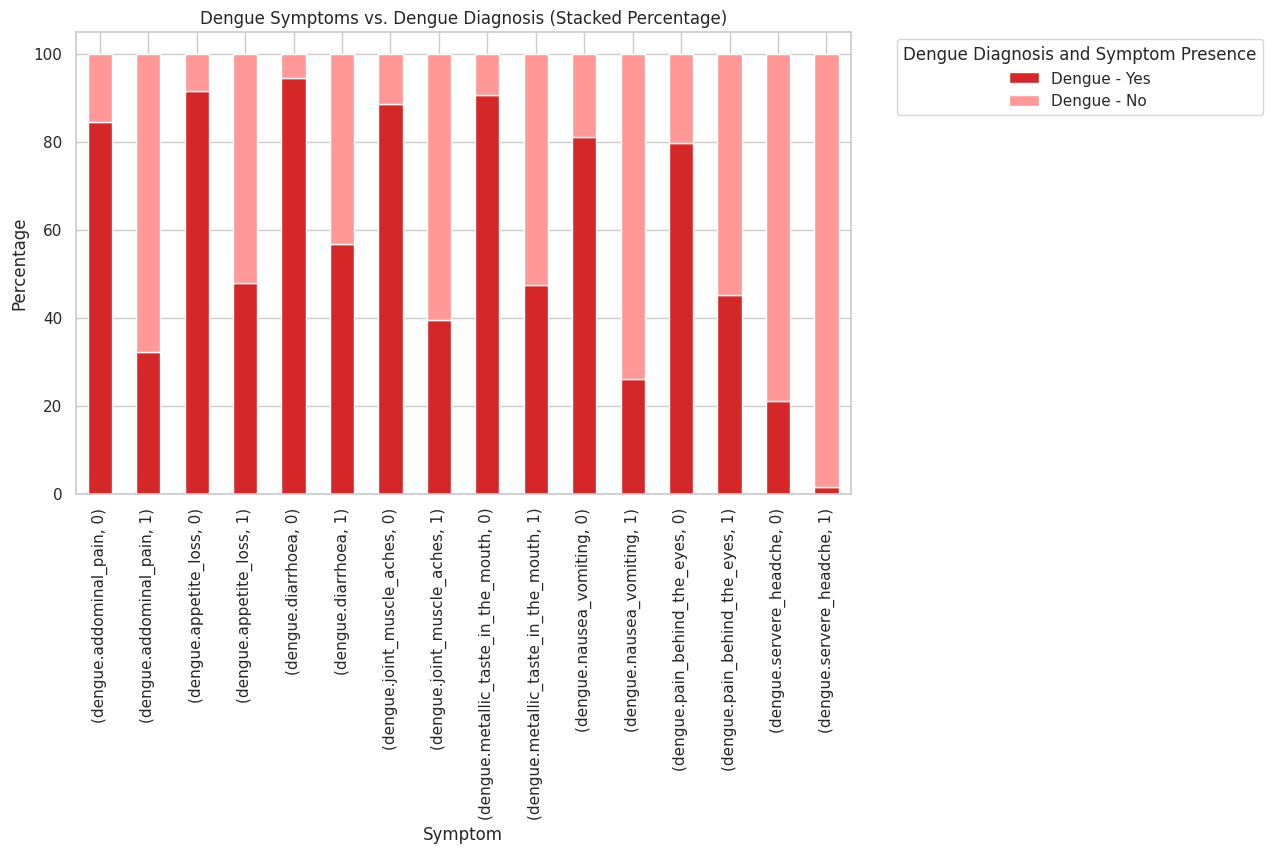

In [ ]:

# Prepare data for stacked bar plot
stacked_data = df_melted.groupby(['Symptom', 'dengue_or_not', 'Presence']).size().unstack(fill_value=0)
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Plotting the stacked bar plot
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#d62728', '#ff9896', '#1f77b4', '#aec7e8'])
plt.title('Dengue Symptoms vs. Dengue Diagnosis (Stacked Percentage)')
plt.xlabel('Symptom')
plt.ylabel('Percentage')
plt.legend(title='Dengue Diagnosis and Symptom Presence', labels=['Dengue - Yes', 'Dengue - No', 'No Dengue - Yes', 'No Dengue - No'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

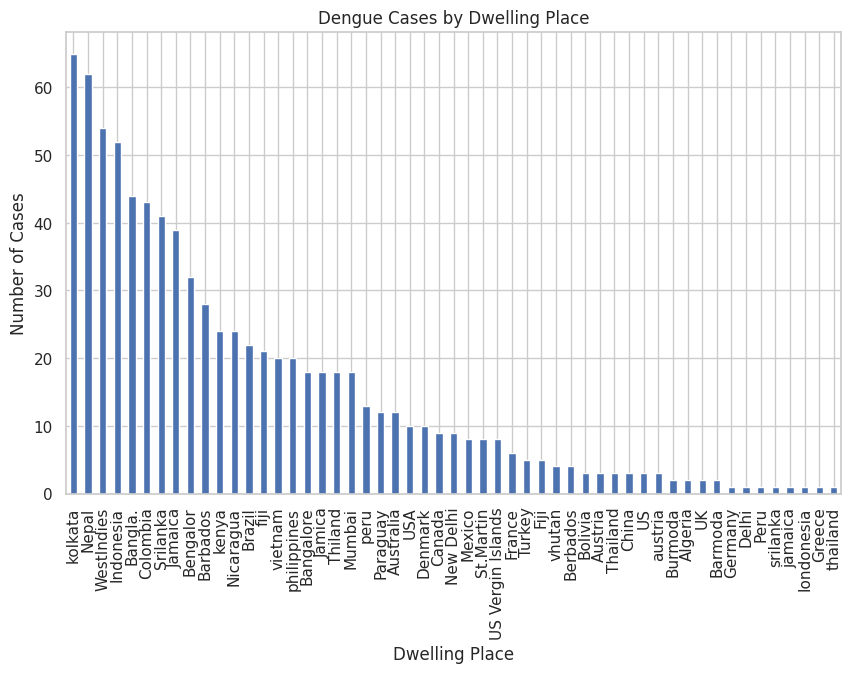

In [ ]:
plt.figure(figsize=(10, 6))
dwelling_place_counts = df['dengue.dwelling place '].value_counts()
dwelling_place_counts.plot(kind='bar', stacked=True)
plt.title('Dengue Cases by Dwelling Place')
plt.xlabel('Dwelling Place')
plt.ylabel('Number of Cases')
plt.show()


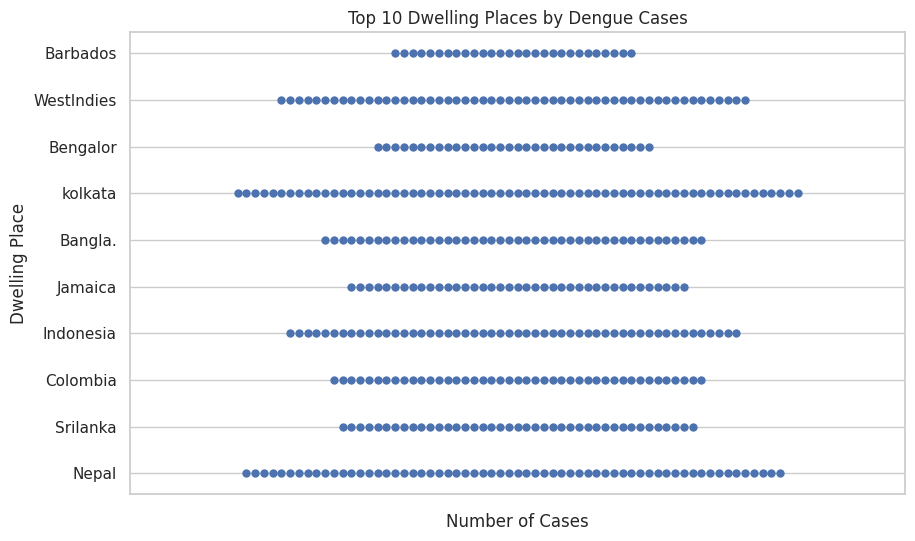

In [ ]:
# Geographical Analysis with Swarm Plot
plt.figure(figsize=(10, 6))
top_places = df['dengue.dwelling place '].value_counts().head(10)
sns.swarmplot(y='dengue.dwelling place ', data=df[df['dengue.dwelling place '].isin(top_places.index)], size=6)
plt.title('Top 10 Dwelling Places by Dengue Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Dwelling Place')
plt.show()


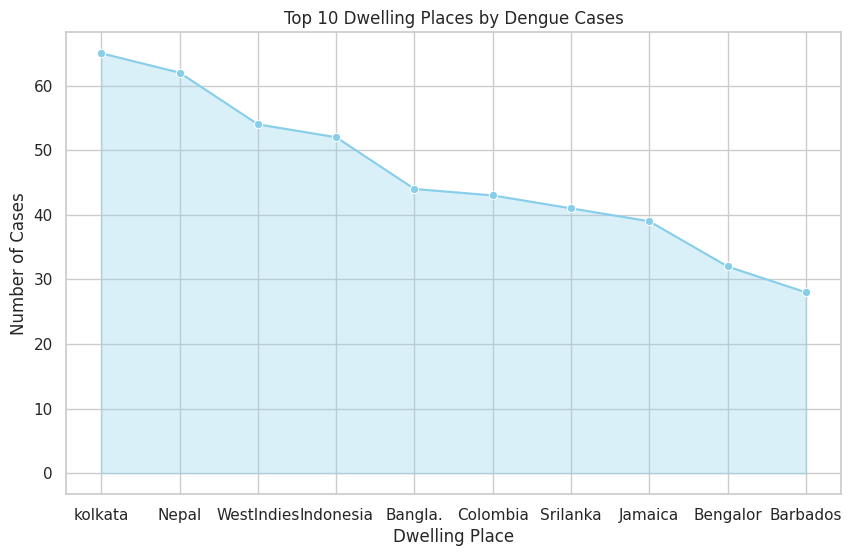

In [ ]:
# Geographical Analysis with Area Plot
plt.figure(figsize=(10, 6))
top_places = df['dengue.dwelling place '].value_counts().head(10)
places_count = df['dengue.dwelling place '].value_counts()
sns.lineplot(x=top_places.index, y=places_count[top_places.index], marker='o', color='skyblue')
plt.fill_between(top_places.index, places_count[top_places.index], color='skyblue', alpha=0.3)
plt.title('Top 10 Dwelling Places by Dengue Cases')
plt.xlabel('Dwelling Place')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()


In [ ]:
!pip install lifelines

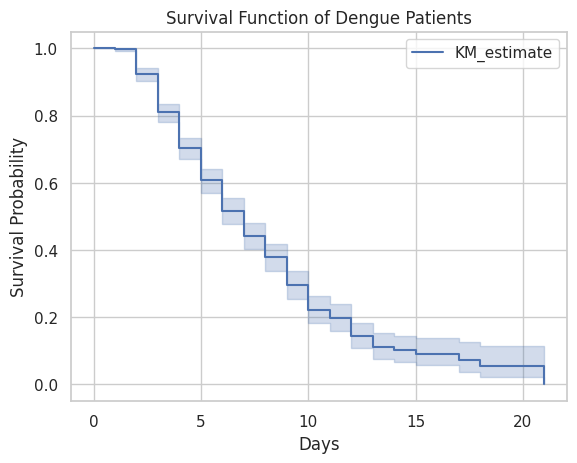

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations=df['dengue.days'], event_observed=df['dengue_or_not'])
kmf.plot_survival_function()
plt.title('Survival Function of Dengue Patients')
plt.xlabel('Days')
plt.ylabel('Survival Probability')
plt.show()

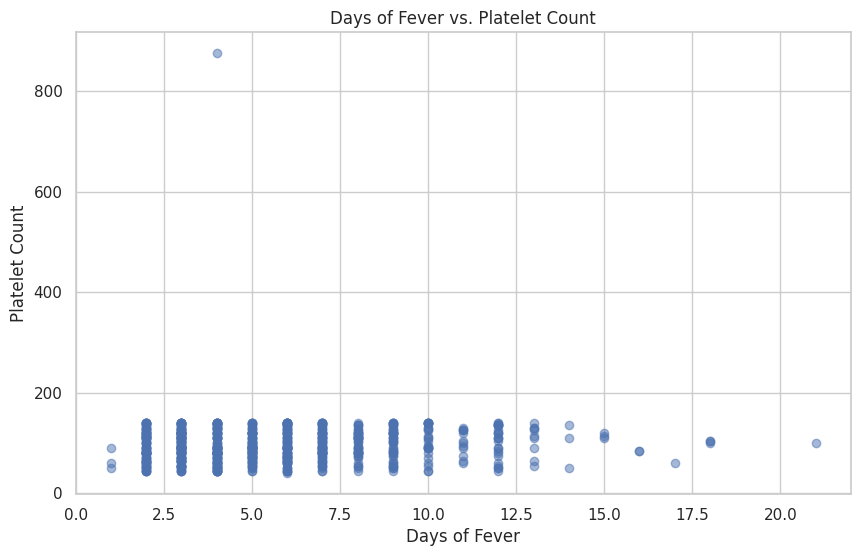

In [ ]:
# Define columns to visualize
x_column = 'dengue.days'
y_column = 'dengue.platelet'

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title('Days of Fever vs. Platelet Count')
plt.xlabel('Days of Fever')
plt.ylabel('Platelet Count')
plt.grid(True)
plt.show()


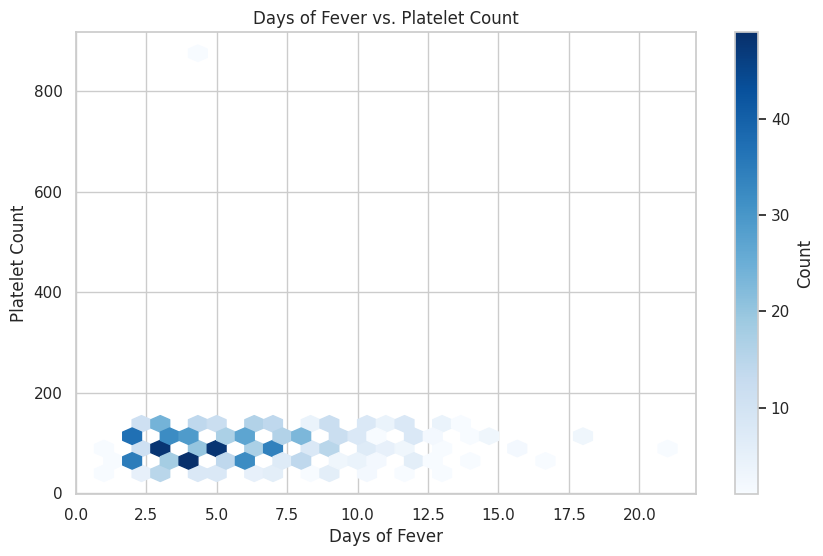

In [ ]:
# Hexbin Plot
plt.figure(figsize=(10, 6))
plt.hexbin(df[x_column], df[y_column], gridsize=30, cmap='Blues', mincnt=1)
cb = plt.colorbar(label='Count')
plt.title('Days of Fever vs. Platelet Count')
plt.xlabel('Days of Fever')
plt.ylabel('Platelet Count')
plt.grid(True)
plt.show()


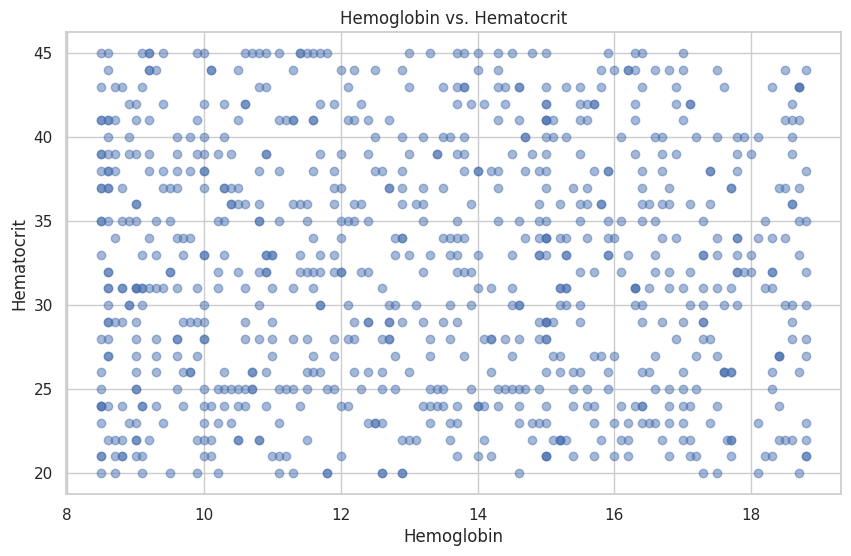

In [ ]:
# Define columns to visualize
x_column = 'dengue.hemoglobin'
y_column = 'dengue._hematocri'

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title('Hemoglobin vs. Hematocrit')
plt.xlabel('Hemoglobin')
plt.ylabel('Hematocrit')
plt.grid(True)
plt.show()


<ipython-input-69-3db8a42efa29>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[x_column], y=df[y_column], cmap="Blues", shade=True, thresh=0.05)


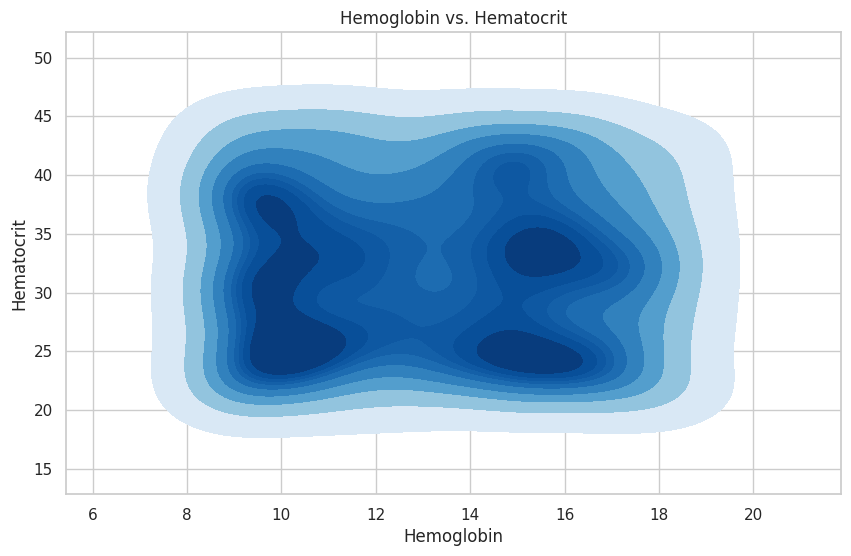

In [ ]:
# Define columns to visualize
x_column = 'dengue.hemoglobin'
y_column = 'dengue._hematocri'

# Plot the joint KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df[x_column], y=df[y_column], cmap="Blues", shade=True, thresh=0.05)
plt.title('Hemoglobin vs. Hematocrit')
plt.xlabel('Hemoglobin')
plt.ylabel('Hematocrit')
plt.grid(True)
plt.show()

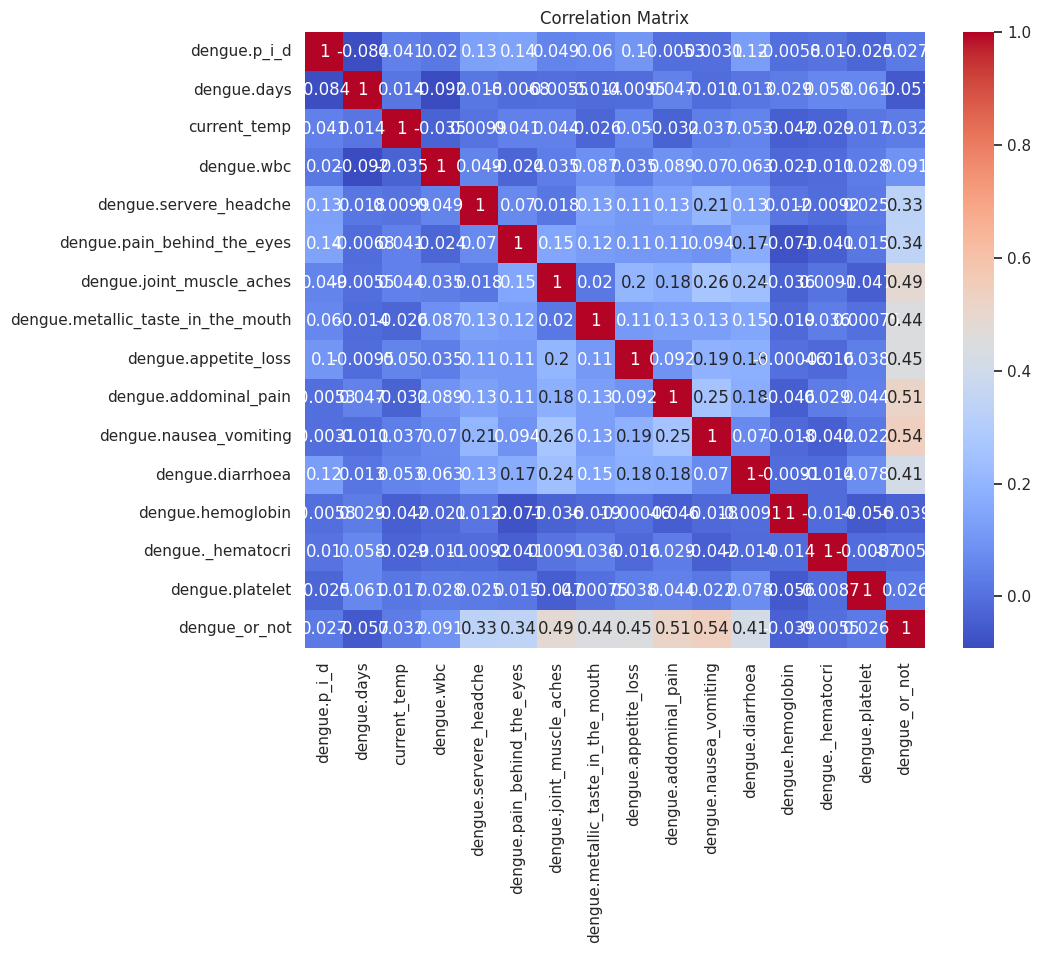

In [ ]:
# Exclude non-numeric columns before computing correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Correlation Analysis
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df)

     dengue.p_i_d dengue.date_of_fever dengue.dwelling place   dengue.days  \
0               0           2024-01-13              Bangalore         10.0   
1               1           2024-02-13              New Delhi          4.0   
2               2           2024-01-09                 Jamica          5.0   
3               3           2024-08-12               Barbados         12.0   
4               4           2024-10-12              St.Martin          3.0   
..            ...                  ...                    ...          ...   
815           815           2024-07-05                  kenya          6.0   
816           816           2024-03-23                Bangla.          7.0   
817           817           2024-07-07               Colombia          3.0   
818           818           2024-12-16                   fiji          4.0   
819           819           2024-03-13                  Nepal          6.0   

     current_temp  dengue.wbc  dengue.servere_headche  \
0     

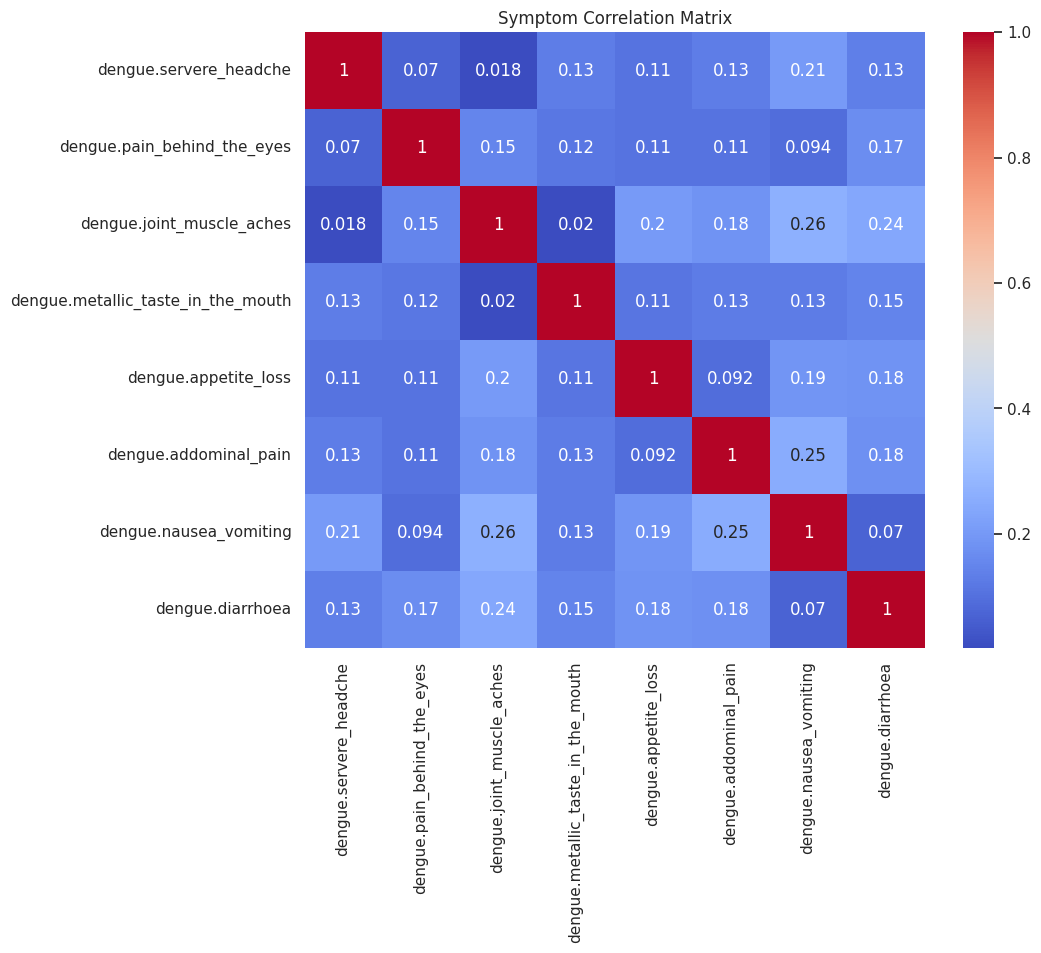

In [ ]:
# Assuming df is already loaded
# Define the symptoms list
symptoms = [
    'dengue.servere_headche', 'dengue.pain_behind_the_eyes', 'dengue.joint_muscle_aches',
    'dengue.metallic_taste_in_the_mouth', 'dengue.appetite_loss', 'dengue.addominal_pain',
    'dengue.nausea_vomiting', 'dengue.diarrhoea'
]


# Check if the defined symptoms exist in the dataset columns
for symptom in symptoms:
    if symptom not in df.columns:
        print(f'Column {symptom} not found in the dataset.')



# Drop rows with any NaN values in the symptom columns
symptom_data = df[symptoms].dropna()

# Calculate the correlation matrix
correlation_matrix = symptom_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Symptom Correlation Matrix')
plt.show()

In [ ]:
print(df)

     dengue.p_i_d dengue.date_of_fever dengue.dwelling place   dengue.days  \
0               0           2024-01-13              Bangalore         10.0   
1               1           2024-02-13              New Delhi          4.0   
2               2           2024-01-09                 Jamica          5.0   
3               3           2024-08-12               Barbados         12.0   
4               4           2024-10-12              St.Martin          3.0   
..            ...                  ...                    ...          ...   
815           815           2024-07-05                  kenya          6.0   
816           816           2024-03-23                Bangla.          7.0   
817           817           2024-07-07               Colombia          3.0   
818           818           2024-12-16                   fiji          4.0   
819           819           2024-03-13                  Nepal          6.0   

     current_temp  dengue.wbc  dengue.servere_headche  \
0     

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE



In [ ]:
# Splitting the dataset into features and target variable
X = df.drop('dengue_or_not', axis=1)
y = df['dengue_or_not']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Encode categorical features and standardize numerical features
categorical_features = ['dengue.dwelling place ']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Feature selection using RFE
model = LogisticRegression(random_state=42)
rfe = RFE(model, n_features_to_select=5)  # Select the top 5 features
X_rfe = rfe.fit_transform(X_transformed, y)

# Get the names of the original and one-hot encoded feature names
preprocessor.fit(X)
num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)
all_features = list(num_features) + list(cat_features)

# Get the selected feature names
selected_features = [all_features[i] for i in rfe.get_support(indices=True)]
print("Selected Features:", selected_features)


Selected Features: ['dengue.metallic_taste_in_the_mouth', 'dengue.appetite_loss', 'dengue.addominal_pain', 'dengue.nausea_vomiting', 'dengue.dwelling place _Bangalore']


In [ ]:

# Splitting the data into training and testing sets with selected features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Training the model with selected features
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))



Accuracy: 0.9451219512195121
Precision: 1.0
Recall: 0.91
F1 Score: 0.9528795811518325

Confusion Matrix:
[[64  0]
 [ 9 91]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        64
           1       1.00      0.91      0.95       100

    accuracy                           0.95       164
   macro avg       0.94      0.96      0.94       164
weighted avg       0.95      0.95      0.95       164



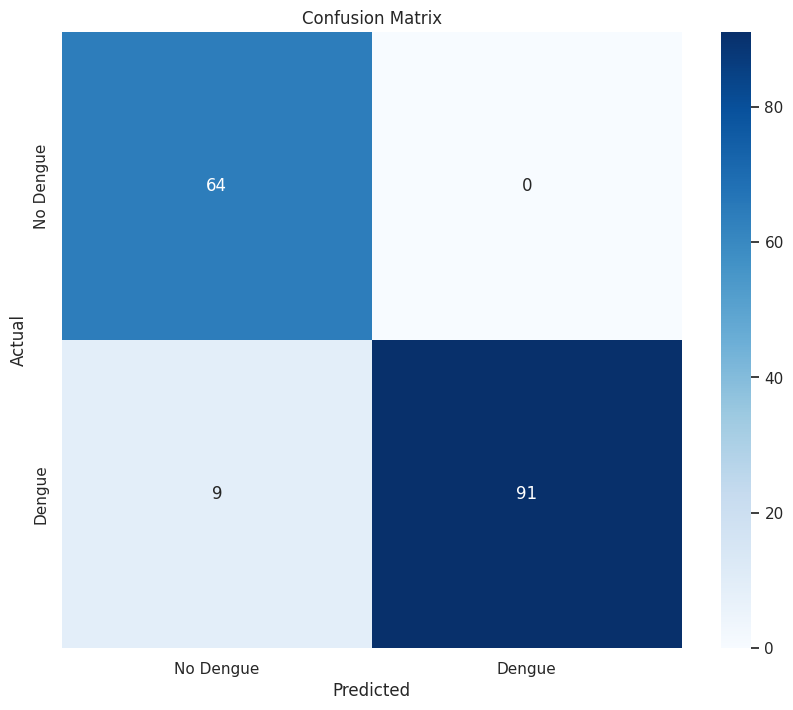

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Dengue', 'Dengue'], yticklabels=['No Dengue', 'Dengue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()